TEMPERATURE PREDICTION

Using linear regression, scikitlearn, numpy, pandas, feature engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
weather=pd.read_csv(r'F:\Front end\MLL\weather (1).csv',index_col='DATE')
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploratory Analysis

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19287 entries, 1970-01-01 to 2022-10-21
Data columns (total 44 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  19287 non-null  object 
 1   NAME     19287 non-null  object 
 2   ACMH     9615 non-null   float64
 3   ACSH     9616 non-null   float64
 4   AWND     14171 non-null  float64
 5   FMTM     10124 non-null  float64
 6   PGTM     12269 non-null  float64
 7   PRCP     19287 non-null  float64
 8   SNOW     19287 non-null  float64
 9   SNWD     19285 non-null  float64
 10  TAVG     6164 non-null   float64
 11  TMAX     19287 non-null  int64  
 12  TMIN     19287 non-null  int64  
 13  TSUN     31 non-null     float64
 14  WDF1     9611 non-null   float64
 15  WDF2     9669 non-null   float64
 16  WDF5     9586 non-null   float64
 17  WDFG     5121 non-null   float64
 18  WDFM     1 non-null      float64
 19  WESD     6071 non-null   float64
 20  WSF1     9614 non-null   float64
 21  WSF

In [6]:
weather.describe()

,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
count,9615.000000,9616.000000,14171.000000,10124.000000,12269.000000,19287.000000,19287.000000,19285.000000,6164.000000,19287.000000,...,14.0,2185.0,887.0,42.0,6577.0,60.0,1167.0,5.0,49.0,1.0
mean,57.886635,60.665557,11.234329,1438.505828,1383.805852,0.117869,0.064671,0.209645,55.554672,61.820086,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,30.612050,33.353307,4.791638,758.281872,631.437135,0.330974,0.598955,1.272844,16.566519,17.410481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,30.000000,30.000000,8.280000,1101.750000,1023.000000,0.000000,0.000000,0.000000,43.000000,48.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,60.000000,70.000000,10.510000,1526.000000,1458.000000,0.000000,0.000000,0.000000,56.000000,62.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,80.000000,90.000000,13.420000,1850.000000,1837.000000,0.040000,0.000000,0.000000,71.000000,77.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,100.000000,100.000000,308.030000,32767.000000,2359.000000,7.800000,30.300000,28.000000,91.000000,103.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


finding percentage of null values in the columns

In [7]:
null_perc=weather.apply(pd.isnull).sum()/weather.shape[0]
null_perc.sort_values(ascending=True)

STATION    0.000000
NAME       0.000000
TMIN       0.000000
PRCP       0.000000
SNOW       0.000000
TMAX       0.000000
SNWD       0.000104
AWND       0.265256
PGTM       0.363872
FMTM       0.475087
WDF2       0.498678
WSF2       0.498678
ACSH       0.501426
ACMH       0.501478
WSF1       0.501530
WDF1       0.501685
WDF5       0.502981
WSF5       0.503033
WSFG       0.613055
WT01       0.630217
WT16       0.658993
TAVG       0.680406
WESD       0.685228
WDFG       0.734484
WT08       0.796962
WT13       0.886711
WT03       0.933271
WT02       0.935034
WT18       0.939493
WT14       0.954010
WT05       0.981127
WT04       0.982579
WT06       0.990615
WT09       0.992741
WT07       0.994400
WT17       0.996889
WT22       0.997459
WT15       0.997822
TSUN       0.998393
WT11       0.999274
WT21       0.999741
WSFM       0.999948
WDFM       0.999948
WV01       0.999948
dtype: float64

Getting those columns that have less than 5% mmissing values

In [8]:
valid_col=weather.columns[null_perc<0.05]
valid_col

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

Taking only those columns that are valid

In [9]:
weather = weather[valid_col].copy()
weather.columns = weather.columns.str.lower()
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


Dealing with missing values

In [10]:
tp=weather.isnull().sum()
tp
# only 2 missing values in snow width so we fill it using ffill 

station    0
name       0
prcp       0
snow       0
snwd       2
tmax       0
tmin       0
dtype: int64

In [11]:
weather=weather.ffill()

In [12]:
weather.isnull().sum()
# all missing values have been resolved

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [13]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [14]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19287)

In [15]:
# converting dtype of index from string to datetime
weather.index=pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=19287, freq=None)

In [16]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


Visualising the data

<AxesSubplot: xlabel='DATE'>

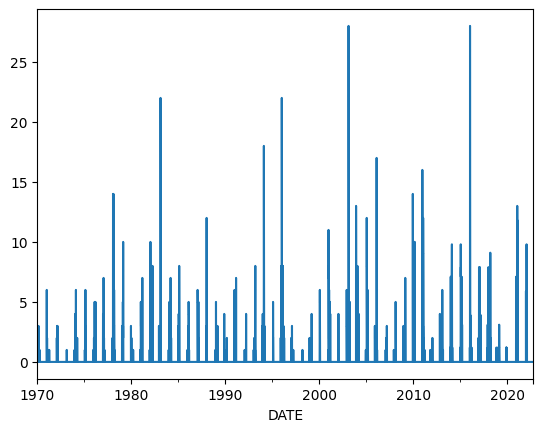

In [18]:
weather['snwd'].plot()

<AxesSubplot: xlabel='DATE', ylabel='tmax'>

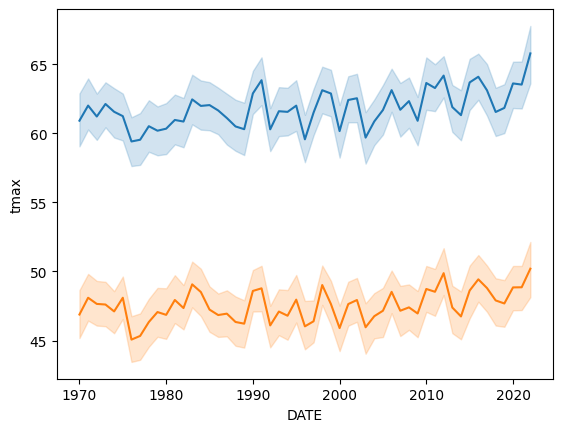

In [19]:
sns.lineplot(data=weather,x=weather.index.year,y='tmax')
sns.lineplot(data=weather,x=weather.index.year,y='tmin')

In [20]:
# Creating the target column which is going to be the label(what we will bne predicting)
weather['target']=weather.shift(-1)['tmax']
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [21]:
weather=weather.ffill()
weather.tail()

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,64.0


From the correlation it is clear that the weather is higle correlated to the max and min temperature

In [22]:
weather.corr()['target'].sort_values()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13544\4234403371.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()['target'].sort_values()


snwd     -0.241054
snow     -0.172737
prcp     -0.003358
tmax      0.915296
tmin      0.915461
target    1.000000
Name: target, dtype: float64

MODEL CREATION 

Creating the Linear Regression model
Since the data we are dealing with right now is time series data, we don't use Cross Validation. Instead we use a technique that is called backtesting. 

In [23]:
from sklearn.linear_model import Ridge

In [24]:
ridge_model=Ridge(alpha=0.1)

Getting the features and the labels from the dataset to train and test the model

In [25]:
predictors=weather.columns[~weather.columns.isin(['target','name','station'])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

Creating a function to check Cross Validation for time series data
Starting from data after 10 years and predictions are made for every 90 days
So predictions are made from 1980 to 2022 in the interval of 90 days 

In [27]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    

    # training data is till the ith row and test data is from i to (i+90)th row  
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
    
        # X_train=train[predictors], y_train=train[target]
        model.fit(train[predictors], train["target"])
    

        preds = model.predict(test[predictors])

        # coverting the predictions to pandas series and merging the 
        # predictions with the actual temp
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [28]:
predictions=backtest(weather,ridge_model,predictors)
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2022-10-17,58.0,67.543412,9.543412
2022-10-18,56.0,60.511771,4.511771
2022-10-19,61.0,57.030435,3.969565


Evaluation of the model

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mean_absolute_error(predictions['actual'],predictions['prediction'])

5.13932667966084

In [32]:
mean_squared_error(predictions['actual'],predictions['prediction'])

43.0560595840309

Increasing the accuracy of the model by creating additional sprecific features  

In [34]:
def pct_diff(old, new):
    return (new - old) / old

# in this function we are calculating the mean values of the 
# columns for a particular interval and then creating new columns to store it
def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [35]:
weather.head()

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0,32.333333,0.175258,23.000000,0.086957,0.006667,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0,33.333333,-0.070000,23.333333,-0.014286,0.006667,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,34.666667,0.009615,23.000000,-0.086957,0.006667,-1.0,NaN,NaN,NaN,NaN,NaN,NaN


Now there are a missing values in the dataset from which we remove the data
Missing values are present in those rows for which rolling mean can't be
calculated. 14 day rolling can't be calculated for first 14 rows as 14 days
of historical data isn't present 

In [36]:
weather=weather.iloc[14:,:]

weather.apply(pd.isnull).sum().sort_values(ascending=False)

rolling_3_prcp_pct     6713
rolling_14_prcp_pct     226
name                      0
rolling_14_prcp           0
rolling_14_tmin_pct       0
rolling_14_tmin           0
rolling_14_tmax_pct       0
rolling_14_tmax           0
rolling_3_prcp            0
rolling_3_tmin_pct        0
station                   0
rolling_3_tmax_pct        0
rolling_3_tmax            0
target                    0
tmin                      0
tmax                      0
snwd                      0
snow                      0
prcp                      0
rolling_3_tmin            0
dtype: int64

In [37]:
weather=weather.fillna(0)
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,18.000000,-0.277778,0.000000,0.0,29.857143,-0.028708,18.857143,-0.310606,0.022857,-1.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,16.666667,0.260000,0.000000,0.0,30.214286,0.191489,18.785714,0.117871,0.022857,-1.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,21.333333,0.406250,0.006667,2.0,30.571429,0.406542,19.142857,0.567164,0.022857,-0.125000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,25.333333,-0.013158,0.040000,1.5,31.357143,0.339408,19.285714,0.296296,0.030000,2.333333
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,23.666667,-0.323944,0.040000,-1.0,30.642857,-0.184149,18.928571,-0.154717,0.030000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0,67.000000,0.000000,51.000000,0.058824,0.026667,2.0,67.142857,-0.002128,50.785714,0.063291,0.233571,-0.657492
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0,63.666667,-0.089005,51.333333,-0.064935,0.026667,-1.0,67.285714,-0.138004,50.857143,-0.056180,0.135000,-1.000000
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,48.333333,-0.110345,0.026667,-1.0,67.000000,-0.164179,50.000000,-0.140000,0.095714,-1.000000


In [38]:
weather.apply(pd.isnull).sum().sort_values(ascending=False)
# now all null values have been removed

station                0
name                   0
rolling_14_prcp        0
rolling_14_tmin_pct    0
rolling_14_tmin        0
rolling_14_tmax_pct    0
rolling_14_tmax        0
rolling_3_prcp_pct     0
rolling_3_prcp         0
rolling_3_tmin_pct     0
rolling_3_tmin         0
rolling_3_tmax_pct     0
rolling_3_tmax         0
target                 0
tmin                   0
tmax                   0
snwd                   0
snow                   0
prcp                   0
rolling_14_prcp_pct    0
dtype: int64

In [39]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    # this creates a column that stores the average monthly columns for the given col
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    # this creates a column that stores the average daily columns for the given col
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [40]:
# Now after creating the new predictors we run our model again
predictors=weather.columns[~weather.columns.isin(['target','name','station'])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

In [41]:
predictions=backtest(weather,ridge_model,predictors)

In [42]:
mean_absolute_error(predictions['actual'],predictions['prediction'])

4.792510527138963

In [43]:
mean_squared_error(predictions['actual'],predictions['prediction'])
# Now both the errors have been reduced

37.61074777275778

In [44]:
predictions.sort_values('diff',ascending=False)

,actual,prediction,diff
DATE,,,
1990-03-12,85.0,54.361065,30.638935
2007-03-26,78.0,49.965413,28.034587
1998-03-26,80.0,51.966675,28.033325
2003-04-15,86.0,59.432179,26.567821
1985-04-18,84.0,58.425960,25.574040
...,...,...,...
1987-09-16,75.0,75.001185,0.001185
1984-08-10,83.0,82.999179,0.000821
2011-09-25,78.0,77.999237,0.000763
